## EDA and Visualization of Daily Minimum Temperatures in Melbourne Dataset

In [1]:
# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/daily-minimum-temperatures-in-melbourne/daily-minimum-temperatures-in-me.csv


Loading the dataset

In [2]:
df = pd.read_csv('/kaggle/input/daily-minimum-temperatures-in-melbourne/daily-minimum-temperatures-in-me.csv', error_bad_lines=False, parse_dates=[0])
df.head()

b'Skipping line 3653: expected 2 fields, saw 3\n'


,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


## Exploratory Data Analysis (EDA) to understand the dataset

In [3]:
df.shape

(3650, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           3650 non-null   datetime64[ns]
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 57.2+ KB


In [5]:
df.isnull().sum()

Date                                                             0
Daily minimum temperatures in Melbourne, Australia, 1981-1990    0
dtype: int64

No missing values in the dataset

Rename lengthly temperature column name

In [6]:
df = df.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990' : 'Temp'})
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


Daily minimum temperatures column needs to be converted to float datatype

however there are few values that can not be converted to float

In [7]:
temperature_values = df['Temp'].unique()
temperature_values

array(['20.7', '17.9', '18.8', '14.6', '15.8', '17.4', '21.8', '20.0',
       '16.2', '13.3', '16.7', '21.5', '25.0', '20.6', '24.8', '17.7',
       '15.5', '18.2', '12.1', '14.4', '16.0', '16.5', '18.7', '19.4',
       '17.2', '15.1', '15.4', '15.3', '21.9', '19.9', '16.6', '16.8',
       '17.1', '15.0', '13.7', '13.9', '18.3', '22.0', '22.1', '21.2',
       '18.4', '16.1', '15.7', '18.5', '16.9', '17.5', '17.8', '18.6',
       '17.0', '14.3', '11.4', '16.3', '11.8', '12.2', '14.7', '11.3',
       '10.6', '11.7', '14.2', '11.2', '8.1', '8.0', '8.8', '13.4',
       '10.9', '11.0', '14.5', '18.1', '10.0', '14.9', '15.9', '13.0',
       '7.6', '11.5', '13.5', '12.4', '13.2', '13.8', '9.0', '9.8', '8.9',
       '7.4', '9.9', '9.3', '8.6', '11.9', '14.0', '12.0', '10.5', '10.7',
       '10.1', '5.3', '6.6', '8.5', '5.9', '3.2', '2.1', '3.4', '5.4',
       '9.6', '12.3', '12.6', '12.8', '11.6', '5.7', '7.1', '2.5', '3.5',
       '4.6', '7.7', '10.4', '9.2', '6.1', '2.7', '4.3', '6.3', '3.8'

Identify the values that can not be converted as float

In [8]:
notdigit = df[~df['Temp'].str[0].str.isdigit()]
notdigit

,Date,Temp
565,1982-07-20,?0.2
566,1982-07-21,?0.8
1290,1984-07-14,?0.1


Process the values identified so the column datatype can be converted to float

In [9]:
df['Temp'] = df['Temp'].apply(lambda x:x.replace('?', ''))
df['Temp'] = df['Temp'].astype(float)

The Temp column has been converted as float 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [11]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


Number of years present in the data

In [12]:
df['Date'].dt.year.nunique()

10

Data of 10 different years present and the years are:

In [13]:
df['Date'].dt.year.unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990])

## Data Visualization

Lineplot of the dataset

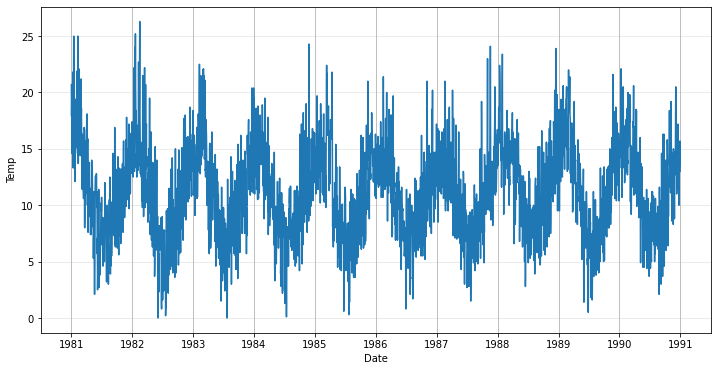

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Date'], y=df['Temp'])
plt.grid(axis='x')
plt.grid(axis='y', alpha=0.3)
plt.show()

Visualize the Trend of the data

In [15]:
def get_trend(timeseries, deg=3):
  x = list(range(len(timeseries)))
  y = timeseries.values
  coef = np.polyfit(x, y, deg)
  trend = np.poly1d(coef)(x)
  return pd.Series(data=trend, index = timeseries.index)

df['Trend'] = get_trend(df['Temp'])
df.head()

,Date,Temp,Trend
0,1981-01-01,20.7,12.591767
1,1981-01-02,17.9,12.587840
2,1981-01-03,18.8,12.583918
3,1981-01-04,14.6,12.580001
4,1981-01-05,15.8,12.576088


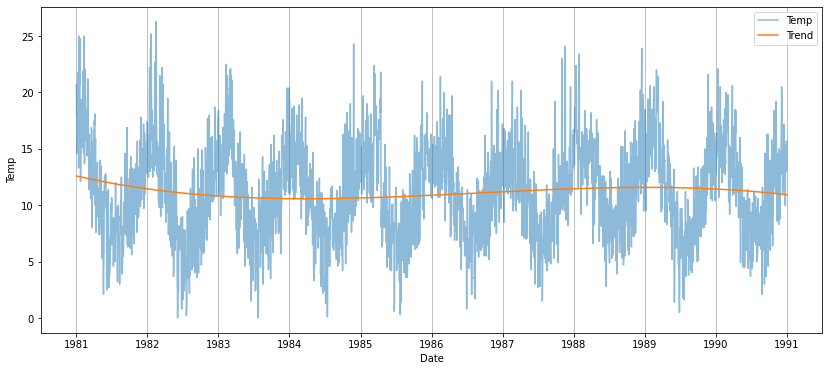

In [16]:
plt.figure(figsize=(14,6))
sns.lineplot(x=df['Date'], y=df['Temp'], alpha=0.5, label='Temp')
sns.lineplot(x=df['Date'], y=df['Trend'], label='Trend')
plt.grid(axis='x')
plt.legend()
plt.show()

Looking into the year 1981 data (oldest year in the dataset)

In [17]:
df2 = df[df['Date'].dt.year == 1981].iloc[:, :2]
df2.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


Visualize the temperature in year 1981

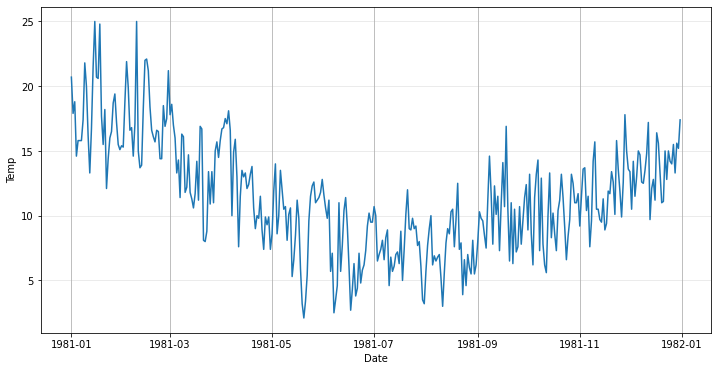

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df2['Date'], y=df2['Temp'])
plt.grid(axis='x')
plt.grid(axis='y', alpha=0.3)
plt.show()

Visualize the trend in temperature in year 1981

In [19]:
def get_trend(timeseries, deg=3):
  x = list(range(len(timeseries)))
  y = timeseries.values
  coef = np.polyfit(x, y, deg)
  trend = np.poly1d(coef)(x)
  return pd.Series(data=trend, index = timeseries.index)

df2['Trend'] = get_trend(df2['Temp'])
df2.head()

,Date,Temp,Trend
0,1981-01-01,20.7,20.356432
1,1981-01-02,17.9,20.250991
2,1981-01-03,18.8,20.145894
3,1981-01-04,14.6,20.041142
4,1981-01-05,15.8,19.936736


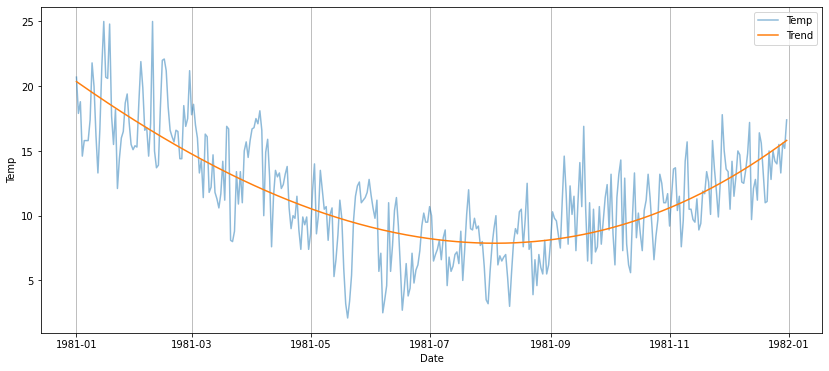

In [20]:
plt.figure(figsize=(14,6))
sns.lineplot(x=df2['Date'], y=df2['Temp'], alpha=0.5, label='Temp')
sns.lineplot(x=df2['Date'], y=df2['Trend'], label='Trend')
plt.grid(axis='x')
plt.legend()
plt.show()

Mean by month in 1981

In [21]:
bymonth = df2.groupby(df2['Date'].dt.month_name(), sort=False).mean()
bymonth = bymonth.iloc[:, :1]
bymonth

,Temp
Date,
January,17.712903
February,17.678571
March,13.500000
April,12.356667
May,9.490323
June,7.306667
July,7.577419
August,7.238710
September,10.143333


Visualize the mean by month in 1981

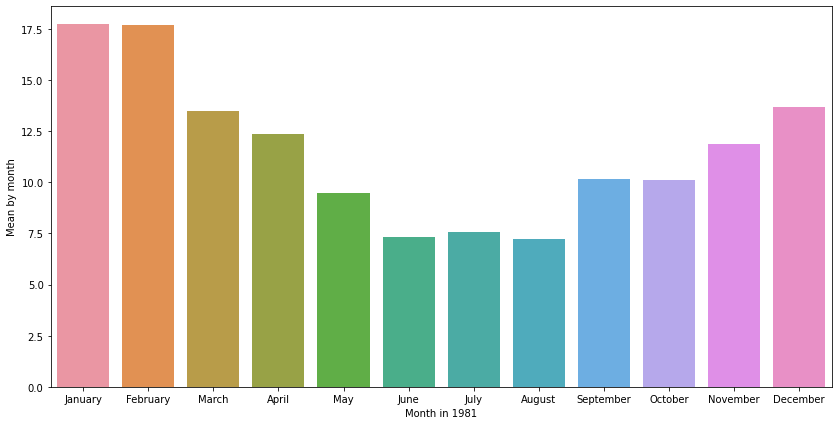

In [22]:
plt.figure(figsize=(14, 7))
bar = sns.barplot(bymonth.index, 'Temp', data=bymonth)
bar.set_ylabel('Mean by month')
bar.set_xlabel('Month in 1981')

plt.show()

Compare 1981 and 1990 (oldest and latest year in the dataset) temperature

In [23]:
comparison = df[(df['Date'].dt.year == 1981) | (df['Date'].dt.year == 1990)].iloc[:, :-1]
comparison.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [24]:
comparison['Day'] = comparison['Date'].dt.strftime('%m-%d')
comparison['Year'] = comparison['Date'].dt.strftime('%Y')

comparison.head()

,Date,Temp,Day,Year
0,1981-01-01,20.7,01-01,1981
1,1981-01-02,17.9,01-02,1981
2,1981-01-03,18.8,01-03,1981
3,1981-01-04,14.6,01-04,1981
4,1981-01-05,15.8,01-05,1981


Convert Day column as datetime column

In [25]:
comparison['Day'] = pd.to_datetime(comparison['Day'], format='%m-%d')

In [26]:
comparison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 3649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    730 non-null    datetime64[ns]
 1   Temp    730 non-null    float64       
 2   Day     730 non-null    datetime64[ns]
 3   Year    730 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 28.5+ KB


In [27]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

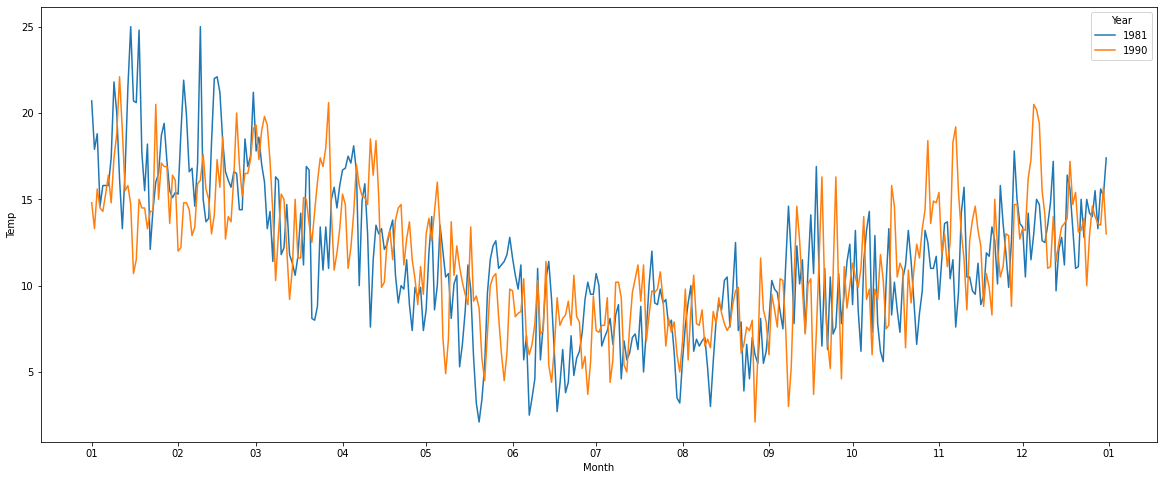

In [28]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(x='Day', y='Temp', hue='Year', data=comparison)

months = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(DateFormatter('%m'))

ax.set(xlabel='Month')
plt.show()